### 📊 Project: Used Cars Price Prediction

Goal: Analyze and predict the price of used cars using Linear and Polynomial Regression models.  
We'll compare model performances using R² Score and Mean Squared Error.

📁 Dataset: usedcars.csv  
- Rows: 201  
- Columns: 29  
- Target: `price`  
- Features: `engine-size`, `horsepower`, `highway-mpg`, etc.



In [3]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# Load Dataset
df = pd.read_csv("usedcars.csv")
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


##### Step 1: Data Preprocessing

In [6]:
# Selecting useful columns and dropping missing values
df = df[["price", "engine-size", "horsepower", "highway-mpg"]]
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,price,engine-size,horsepower,highway-mpg
0,13495.0,130,111.0,27
1,16500.0,130,111.0,27
2,16500.0,152,154.0,26
3,13950.0,109,102.0,30
4,17450.0,136,115.0,22


##### Step 2: Linear Regression Model
We'll use `engine-size` as the independent variable to predict `price`.

In [7]:
# Independent variable and target
X = df[["engine-size"]]
Y = df["price"]

In [8]:
# Linear Model
lm = LinearRegression()
lm.fit(X, Y)

# Prediction
Y_hat = lm.predict(X)

Visualizing Linear Fit

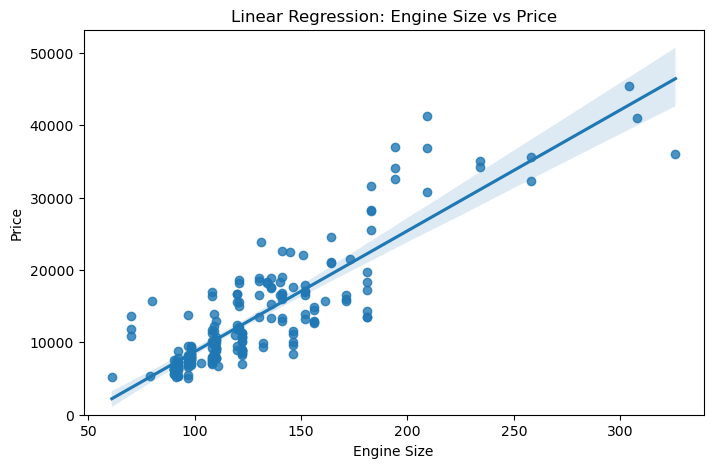

In [10]:
# Set plot size
plt.figure(figsize=(8, 5))

# Regression Line
sns.regplot(x="engine-size", y="price", data=df)

# Set plot limits
plt.ylim(0,)
plt.title("Linear Regression: Engine Size vs Price")
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.show()

Actual vs Predicted - Distribution Plot

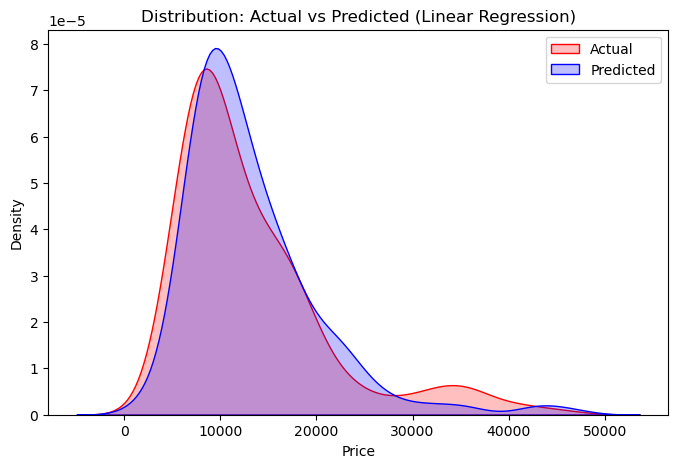

In [11]:
# Set plot size
plt.figure(figsize=(8, 5))

# Residuals
sns.kdeplot(df["price"], color="r", label="Actual", fill=True)
sns.kdeplot(Y_hat, color="b", label="Predicted", fill=True)

# Set plot limits
plt.title("Distribution: Actual vs Predicted (Linear Regression)")
plt.xlabel("Price")
plt.ylabel("Density")
plt.legend()
plt.show()

Evaluation Metrics - Linear Regression

In [14]:
mse = mean_squared_error(Y, Y_hat)
r2 = r2_score(Y, Y_hat)

print(f"Linear Regression R² Score: {r2:.3f}")
print(f"Linear Regression MSE: {mse:.2f}")

Linear Regression R² Score: 0.761
Linear Regression MSE: 15021126.03


##### Step 3: Polynomial Regression (Degree = 2)


In [16]:
# Polynomial Regression
x = df["engine-size"]
y = df["price"]

# Fit degree 2 polynomial
f = np.polyfit(x, y, 2)
p = np.poly1d(f)

# Predict
x_new = np.linspace(min(x), max(x), 100)
y_new = p(x_new)

Plotting Polynomial Fit

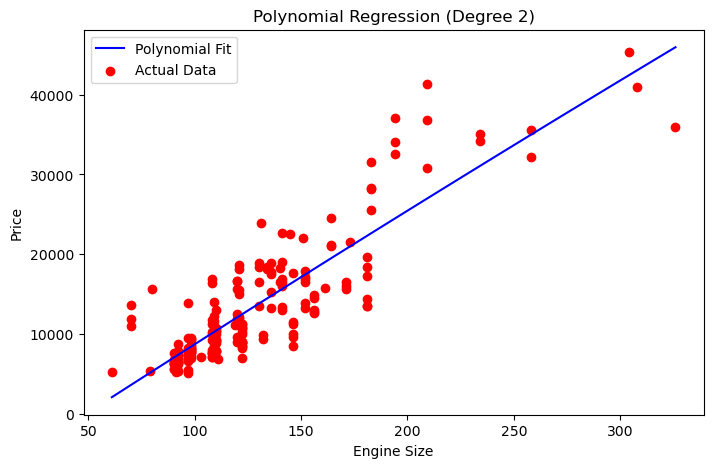

In [17]:
plt.figure(figsize=(8, 5))

# Plot polynomial fit
plt.plot(x_new, y_new, color="blue", label="Polynomial Fit")

# Scatter plot of actual data
plt.scatter(x, y, color="red", label="Actual Data")
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.title("Polynomial Regression (Degree 2)")
plt.legend()
plt.show()


Evaluation - Polynomial Regression

In [ ]:
# Predict on actual data
y_poly_pred = p(x)

mse_poly = mean_squared_error(y, y_poly_pred)
r2_poly = r2_score(y, y_poly_pred)

print(f"Polynomial Regression R² Score: {r2_poly:.3f}")
print(f"Polynomial Regression MSE: {mse_poly:.2f}")

Polynomial Regression R² Score: 0.761
Polynomial Regression MSE: 15016547.00


Pipeline for Polynomial Regression (Multi-feature)

In [ ]:
# Features & target
X_multi = df[["engine-size", "horsepower", "highway-mpg"]]
Y = df["price"]

# Pipeline with PolynomialFeatures (degree=2)
Input = [('poly', PolynomialFeatures(degree=2)), ('model', LinearRegression())]
pipe = Pipeline(Input)

# Fit and Predict
pipe.fit(X_multi, Y)
Y_hat_pipe = pipe.predict(X_multi)

# Evaluation
mse_pipe = mean_squared_error(Y, Y_hat_pipe)
r2_pipe = r2_score(Y, Y_hat_pipe)

print(f"Pipeline Polynomial Regression R² Score: {r2_pipe:.3f}")
print(f"Pipeline Polynomial Regression MSE: {mse_pipe:.2f}")

Pipeline Polynomial Regression R² Score: 0.828
Pipeline Polynomial Regression MSE: 10819563.38


##### Conclusion

| Model Type               | R² Score | MSE        |
|-------------------------|----------|------------|
| Linear Regression        | 0.761   | 15021126.03    |
| Polynomial Regression    | 0.761   | 15016547.00 |
| Pipeline Polynomial (3X) | 0.828   | 10819563.38 |

- Polynomial regression (especially with multiple features) often gives better performance.

AUTHOR | VISURA RODRIGO